# Lead Scoring Case Study

### Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics


### Data loading and understanding

In [4]:
#First we will import our leads dataset using pandas library
data = pd.read_csv('Leads.csv')

In [5]:
data.shape

(9240, 37)

In [6]:
# To check all the variables of the data
pd.set_option('display.max_columns', None)

In [7]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Preprocessing

#### Handling Missing Values

In [10]:
# Checking missing values
data.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [11]:
# Dropping all the columns with more than 30% null values
for col in data.columns:
    if data[col].isnull().sum() > 3000:
        data.drop(col, axis=1, inplace=True)

In [12]:
data.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [13]:
# City and country are not useful for our model. So, we will drop them
data.drop(['City'], axis = 1, inplace = True)
data.drop(['Country'], axis = 1, inplace = True)

In [14]:
# Percentage of null values in each column
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [15]:
# We will find value counts of all columns and check for 'select' value to handle it
for column in data:
    print(data[column].astype('category').value_counts())
    print('___________________________________________________')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


'Specialization', 'Lead Profile', 'How did you hear about X Education' have select values

In [16]:
data['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [17]:
data['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [18]:
data['Lead Profile'].astype('category').value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [19]:
#Clearly Lead profile and How did you hear about X education have a lot of select values which are not useful. 
#So we will drop these columns

In [20]:
data.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [21]:
#Some columns only contain majority of 1 values so, they won't be useful to us. We will drop them
data.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [22]:
#The same applies here also
data['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [23]:
data.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [24]:
data.isnull().mean()*100

Prospect ID                                0.000000
Lead Number                                0.000000
Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                            15.562771
What is your current occupation           29.112554
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [25]:
# 'What is your current occupation' has a lot of null values but we won't drop it since, we have lost a lot of data
data = data[~pd.isnull(data['What is your current occupation'])]

In [26]:
data.isnull().mean()*100

Prospect ID                               0.000000
Lead Number                               0.000000
Lead Origin                               0.000000
Lead Source                               0.549618
Do Not Email                              0.000000
Converted                                 0.000000
TotalVisits                               1.984733
Total Time Spent on Website               0.000000
Page Views Per Visit                      1.984733
Last Activity                             1.572519
Specialization                            0.274809
What is your current occupation           0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [27]:
#The number of null values are very low. so, we will drop rows

In [28]:
data = data[~pd.isnull(data['TotalVisits'])]

In [29]:
data.isnull().mean()*100

Prospect ID                               0.000000
Lead Number                               0.000000
Lead Origin                               0.000000
Lead Source                               0.451713
Do Not Email                              0.000000
Converted                                 0.000000
TotalVisits                               0.000000
Total Time Spent on Website               0.000000
Page Views Per Visit                      0.000000
Last Activity                             0.000000
Specialization                            0.280374
What is your current occupation           0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [30]:
data = data[~pd.isnull(data['Lead Source'])]

In [31]:
data = data[~pd.isnull(data['Specialization'])]

In [32]:
data.isnull().mean()*100

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

OBSERVATION : We have a clean dataset with no missing values

In [33]:
#Prospect ID and Lead Number are redundant, dropping these
data.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

In [34]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


#### Dummy variable creation (One-hot Encoding)

In [35]:
temp = data.loc[:, data.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [36]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True, dtype=int)

# Add the results to the master dataframe
data = pd.concat([data, dummy], axis=1)

In [37]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(data['Specialization'], prefix = 'Specialization', dtype=int)
dummy_spl = dummy_spl.drop(['Specialization_Select'], axis=1)
data = pd.concat([data, dummy_spl], axis = 1)

In [38]:
# Drop the variables for which the dummy variables have been created

data = data.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [39]:
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
data.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_testone', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last 

### Exploratory Data Analysis

In [41]:
data.head(2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


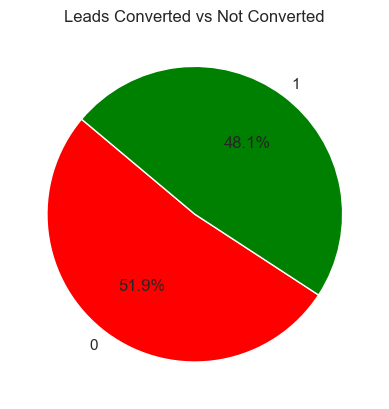

In [97]:
# Converted vs Non-Converted

converted_counts = data['Converted'].value_counts()
plt.pie(converted_counts, labels=converted_counts.index, colors=['Red', 'Green'], autopct='%1.1f%%', startangle=140)
plt.title('Leads Converted vs Not Converted')
plt.show()

OBSERVATION : The data is balanced.

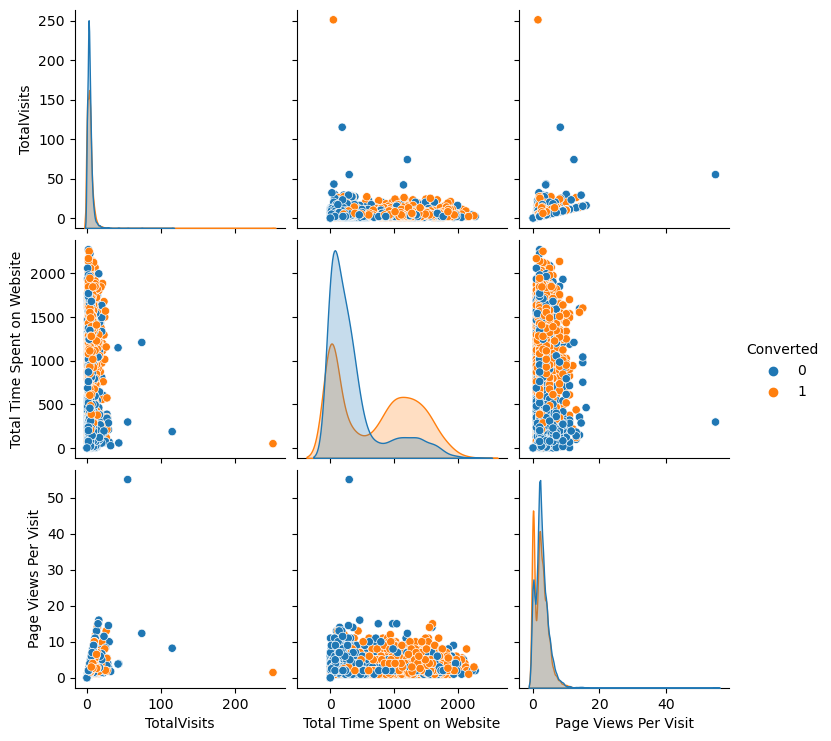

In [43]:
xedu = data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(xedu,diag_kind='kde',hue='Converted')
plt.show()

In [44]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedxedu = pd.DataFrame(pt.fit_transform(xedu))
transformedxedu.columns = xedu.columns
transformedxedu.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.539988,-1.532509,-1.534722,-0.962570
1,0.690854,0.641870,0.230818,-0.962570
2,-0.219742,1.262512,-0.019004,1.038885
3,-0.723932,0.153656,-0.629842,-0.962570
4,-0.219742,1.204175,-0.629842,1.038885


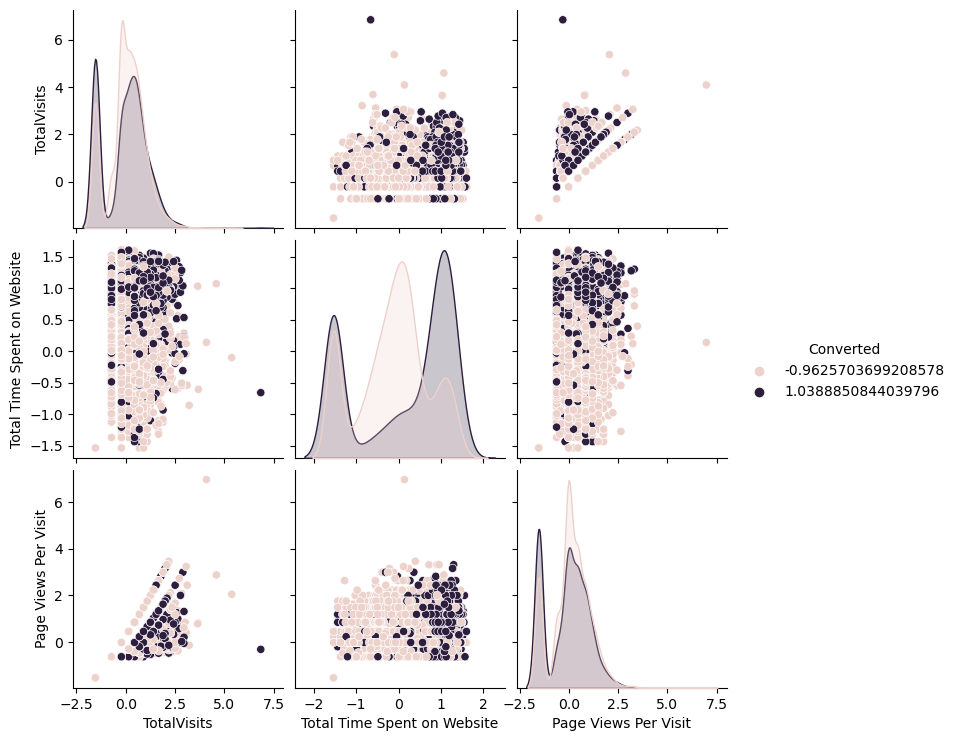

In [45]:
sns.pairplot(transformedxedu,diag_kind='kde',hue='Converted')
plt.show()

OBSERVATION : We can observe a slight linear increase increment in Page Views Per Visit and Total Visits.

### Train-Test Split

In [46]:
# Defining the X and y.
X = data.drop(['Converted'], axis =1)
y = data['Converted']

In [47]:
# Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 80)

In [48]:
# Checking the shapes of our train and test data
print(X_train.shape)
print(X_test.shape)

(4461, 74)
(1912, 74)


In [49]:
# Checking our independent variables dataframe
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
5156,2.0,122,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3204,4.0,940,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2286,11.0,823,3.67,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6530,0.0,0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
864,0.0,0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Scaling

In [50]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [51]:
# Converting the dataset from NumPy nd array to Pandas DataFrame
X_train_df = pd.DataFrame(X_train, columns = X.columns)
X_test_df = pd.DataFrame(X_test, columns = X.columns)

In [52]:
# Checking our training dataframe for independent variables
X_train_df.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
5156,0.007968,0.054807,0.036364,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3204,0.015936,0.422282,0.036364,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2286,0.043825,0.369721,0.066727,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6530,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
864,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Feature Selection

In [53]:
# Defining the estimator and selector
estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select = 15)

In [54]:
# Fitting the RFE selector to the training data.
selector = selector.fit(X_train_df, y_train)
selector.support_

array([ True,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [55]:
# Checking the selected features by RFE
selected_features = X_train_df.columns[selector.support_]
print(selected_features)

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')


In [56]:
# Finalizing the X dataframe by keeping just the selected features
X_train = X_train_df[selected_features]
X_test = X_test_df[selected_features]

### Modeling

In [57]:
# Adding a constant column of ones to the feature matrices 
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [58]:
# Fitting the model on train data
model1 = sm.GLM(np.array(y_train), X_train_sm)
res1 = model1.fit()

In [59]:
# Checking the model summary
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Gaussian   Df Model:                           15
Link Function:               Identity   Scale:                         0.15830
Method:                          IRLS   Log-Likelihood:                -2210.4
Date:                Tue, 21 May 2024   Deviance:                       703.62
Time:                        21:19:18   Pearson chi2:                     704.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4399
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2276      0.095      2.400      0.016       0.042       0.413
TotalVisits                                              1.1337      0.293      3.873      0.000       0.560       1.708
Total Time Spent on Website                              0.7611      0.026     28.892      0.000       0.709       0.813
Lead Origin_Lead Add Form                                0.5836      0.025     22.900      0.000       0.534       0.634
Lead Source_Olark Chat                                   0.2182      0.019     11.216      0.000       0.180       0.256
Lead Source_Welingak Website                             0.1670      0.048      3.462      0.001       0.072       0.262
Do Not Email_Yes                                        -0.1993      0.024     -8.244      0.000      -0.247      -0.152
Last Activity_Converted to Lead                         -0.1237      0.029     -4.284      0.000      -0.180      -0.067
Last Activity_Had a Phone Conversation                   0.1506      0.151      0.999      0.318      -0.145       0.446
Last Activity_SMS Sent                                   0.2075      0.013     15.893      0.000       0.182       0.233
What is your current occupation_Housewife                0.3609      0.163      2.218      0.027       0.042       0.680
What is your current occupation_Student                 -0.1561      0.100     -1.560      0.119      -0.352       0.040
What is your current occupation_Unemployed              -0.1277      0.094     -1.354      0.176      -0.313       0.057
What is your current occupation_Working Professional     0.2005      0.096      2.090      0.037       0.013       0.389
Last Notable Activity_Had a Phone Conversation           0.3792      0.192      1.971      0.049       0.002       0.756
Last Notable Activity_Unreachable                        0.3644      0.103      3.528      0.000       0.162       0.567
========================================================================================================================
"""

In [60]:
# Manual feature selection (dropping features whose p-value > 0.05)
X_train_sm = X_train_sm.drop('Last Activity_Had a Phone Conversation', axis=1)
X_test_sm = X_test_sm.drop('Last Activity_Had a Phone Conversation', axis=1)

In [61]:
# Fitting the model again on train data
model2 = sm.GLM(np.array(y_train), X_train_sm)
res2 = model2.fit()

In [62]:
# Checking the model summary
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Gaussian   Df Model:                           14
Link Function:               Identity   Scale:                         0.15830
Method:                          IRLS   Log-Likelihood:                -2210.9
Date:                Tue, 21 May 2024   Deviance:                       703.78
Time:                        21:19:20   Pearson chi2:                     704.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4398
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2277      0.095      2.401      0.016       0.042       0.414
TotalVisits                                              1.1325      0.293      3.868      0.000       0.559       1.706
Total Time Spent on Website                              0.7611      0.026     28.893      0.000       0.710       0.813
Lead Origin_Lead Add Form                                0.5832      0.025     22.887      0.000       0.533       0.633
Lead Source_Olark Chat                                   0.2179      0.019     11.200      0.000       0.180       0.256
Lead Source_Welingak Website                             0.1672      0.048      3.466      0.001       0.073       0.262
Do Not Email_Yes                                        -0.1990      0.024     -8.233      0.000      -0.246      -0.152
Last Activity_Converted to Lead                         -0.1242      0.029     -4.300      0.000      -0.181      -0.068
Last Activity_SMS Sent                                   0.2071      0.013     15.869      0.000       0.181       0.233
What is your current occupation_Housewife                0.3609      0.163      2.218      0.027       0.042       0.680
What is your current occupation_Student                 -0.1560      0.100     -1.559      0.119      -0.352       0.040
What is your current occupation_Unemployed              -0.1274      0.094     -1.351      0.177      -0.312       0.057
What is your current occupation_Working Professional     0.2014      0.096      2.100      0.036       0.013       0.389
Last Notable Activity_Had a Phone Conversation           0.5293      0.120      4.399      0.000       0.293       0.765
Last Notable Activity_Unreachable                        0.3640      0.103      3.525      0.000       0.162       0.566
========================================================================================================================
"""

In [63]:
# Manual feature selection (dropping features whose p-value > 0.05)
X_train_sm = X_train_sm.drop('What is your current occupation_Student', axis=1)
X_test_sm = X_test_sm.drop('What is your current occupation_Student', axis=1)

In [64]:
# Fitting the model again on train data
model3 = sm.GLM(np.array(y_train), X_train_sm)
res3 = model3.fit()

In [65]:
# Checking the model summary
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Gaussian   Df Model:                           13
Link Function:               Identity   Scale:                         0.15835
Method:                          IRLS   Log-Likelihood:                -2212.1
Date:                Tue, 21 May 2024   Deviance:                       704.17
Time:                        21:19:22   Pearson chi2:                     704.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4394
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0897      0.034      2.638      0.008       0.023       0.156
TotalVisits                                              1.1382      0.293      3.888      0.000       0.564       1.712
Total Time Spent on Website                              0.7624      0.026     28.952      0.000       0.711       0.814
Lead Origin_Lead Add Form                                0.5832      0.025     22.883      0.000       0.533       0.633
Lead Source_Olark Chat                                   0.2173      0.019     11.167      0.000       0.179       0.255
Lead Source_Welingak Website                             0.1673      0.048      3.468      0.001       0.073       0.262
Do Not Email_Yes                                        -0.1990      0.024     -8.229      0.000      -0.246      -0.152
Last Activity_Converted to Lead                         -0.1248      0.029     -4.321      0.000      -0.181      -0.068
Last Activity_SMS Sent                                   0.2068      0.013     15.849      0.000       0.181       0.232
What is your current occupation_Housewife                0.4985      0.137      3.647      0.000       0.231       0.766
What is your current occupation_Unemployed               0.0104      0.033      0.318      0.751      -0.054       0.075
What is your current occupation_Working Professional     0.3391      0.037      9.052      0.000       0.266       0.413
Last Notable Activity_Had a Phone Conversation           0.5289      0.120      4.395      0.000       0.293       0.765
Last Notable Activity_Unreachable                        0.3729      0.103      3.616      0.000       0.171       0.575
========================================================================================================================
"""

In [66]:
# Manual feature selection (dropping features whose p-value > 0.05)
X_train_sm = X_train_sm.drop('What is your current occupation_Unemployed', axis=1)
X_test_sm = X_test_sm.drop('What is your current occupation_Unemployed', axis=1)

In [67]:
# Fitting the model again on train data
model4 = sm.GLM(np.array(y_train), X_train_sm)
res4 = model4.fit()

In [68]:
# Checking the model summary
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Gaussian   Df Model:                           12
Link Function:               Identity   Scale:                         0.15831
Method:                          IRLS   Log-Likelihood:                -2212.2
Date:                Tue, 21 May 2024   Deviance:                       704.18
Time:                        21:19:24   Pearson chi2:                     704.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4395
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0997      0.013      7.751      0.000       0.074       0.125
TotalVisits                                              1.1392      0.293      3.892      0.000       0.565       1.713
Total Time Spent on Website                              0.7623      0.026     28.953      0.000       0.711       0.814
Lead Origin_Lead Add Form                                0.5829      0.025     22.889      0.000       0.533       0.633
Lead Source_Olark Chat                                   0.2168      0.019     11.175      0.000       0.179       0.255
Lead Source_Welingak Website                             0.1677      0.048      3.477      0.001       0.073       0.262
Do Not Email_Yes                                        -0.1989      0.024     -8.226      0.000      -0.246      -0.151
Last Activity_Converted to Lead                         -0.1247      0.029     -4.317      0.000      -0.181      -0.068
Last Activity_SMS Sent                                   0.2071      0.013     15.928      0.000       0.182       0.233
What is your current occupation_Housewife                0.4886      0.133      3.671      0.000       0.228       0.749
What is your current occupation_Working Professional     0.3290      0.020     16.390      0.000       0.290       0.368
Last Notable Activity_Had a Phone Conversation           0.5293      0.120      4.399      0.000       0.293       0.765
Last Notable Activity_Unreachable                        0.3727      0.103      3.615      0.000       0.171       0.575
========================================================================================================================
"""

In [69]:
# Checking the VIF values for multicollinearity
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_sm.columns

vif_data['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns))]

In [70]:
vif_data

,Feature,VIF
0,const,4.662924
1,TotalVisits,1.134018
2,Total Time Spent on Website,1.271545
3,Lead Origin_Lead Add Form,1.525411
4,Lead Source_Olark Chat,1.270828
5,Lead Source_Welingak Website,1.281156
6,Do Not Email_Yes,1.016874
7,Last Activity_Converted to Lead,1.068277
8,Last Activity_SMS Sent,1.068113
9,What is your current occupation_Housewife,1.004942


OBSERVATION : There are no vif values greater than 5, we are good to go for evaluation

### Making Predictions on train dataset based on final model

In [71]:
# Calculating predicted values of 'y_train':-

y_train_pred = res4.predict(X_train_sm)
y_train_pred[:10] # Displaying 10 values

5156   -0.048297
3204    0.646908
2286    0.638611
6530    0.316508
864     0.316508
7780    0.188161
3332    0.526926
9221    0.786287
3355    1.057453
6899    0.316508
dtype: float64

In [72]:
# Reshaping :-

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([-0.04829697,  0.64690805,  0.63861135,  0.31650841,  0.31650841,
        0.18816081,  0.5269264 ,  0.78628716,  1.0574526 ,  0.31650841])

In [73]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities
# Creating dataframe 'y_train_pred_final' with actual and predicted :-

y_train_pred_final = pd.DataFrame({'Converted' : y_train.values, 'Converted_Prob' : y_train_pred})

# Adding a column 'Prospect ID' for indexing:-

y_train_pred_final['Prospect ID'] = y_train.index

# Displaying head of created dataframe:-

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,-0.048297,5156
1,1,0.646908,3204
2,1,0.638611,2286
3,1,0.316508,6530
4,1,0.316508,864


### Deciding the optimal cutoff point

In [74]:
y_train_pred_final['Converted_Prob'] = y_train_pred_final['Converted_Prob'].clip(0, 1)

# Create columns for different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final['Converted_Prob'].apply(lambda x: 1 if x > i else 0)

In [75]:
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000000,5156,0,0,0,0,0,0,0,0,0,0
1,1,0.646908,3204,1,1,1,1,1,1,1,0,0,0
2,1,0.638611,2286,1,1,1,1,1,1,1,0,0,0
3,1,0.316508,6530,1,1,1,1,0,0,0,0,0,0
4,1,0.316508,864,1,1,1,1,0,0,0,0,0,0


In [76]:
# Calculating the accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.499215  1.000000  0.041613
0.1   0.1  0.531944  0.993427  0.110253
0.2   0.2  0.644250  0.960563  0.355212
0.3   0.3  0.717328  0.930986  0.522094
0.4   0.4  0.781887  0.823944  0.743458
0.5   0.5  0.785474  0.723005  0.842557
0.6   0.6  0.751177  0.579343  0.908194
0.7   0.7  0.697377  0.419249  0.951523
0.8   0.8  0.659493  0.315962  0.973402
0.9   0.9  0.605470  0.184507  0.990133


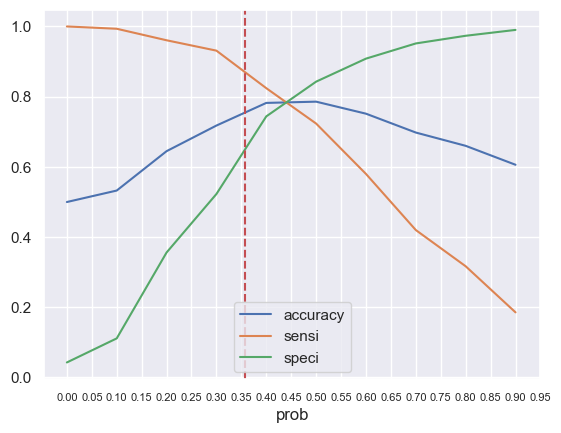

In [77]:
# Plotting accuracy, sensitivity and specificity for various probabilities:-

sns.set(style = 'darkgrid')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.358, color='r', linestyle='--')

plt.show()

OBSERVATION : The cut-off is about 0.36

In [78]:
# Calculating 'final_predicted' based on 'Converted_Prob' using 0.358 cutoff point:-

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.36 else 0)

In [79]:
# Dropping the unnecessary columns:-

y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 

In [80]:
y_train_pred_final.head() 

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.000000,5156,0
1,1,0.646908,3204,1
2,1,0.638611,2286,1
3,1,0.316508,6530,0
4,1,0.316508,864,0


In [81]:
# Assigning the 'Lead_Score' based on 'Converted_Prob' :-

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [82]:
# Selecting only important columns and displaying head of dataframe:-

y_train_pred_final[['Converted','Converted_Prob','Prospect ID','final_predicted','Lead_Score']].head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.000000,5156,0,0
1,1,0.646908,3204,1,65
2,1,0.638611,2286,1,64
3,1,0.316508,6530,0,32
4,1,0.316508,864,0,32


### Model Evaluation

#### Confusion Matrix

In [83]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion)

[[1622  709]
 [ 317 1813]]


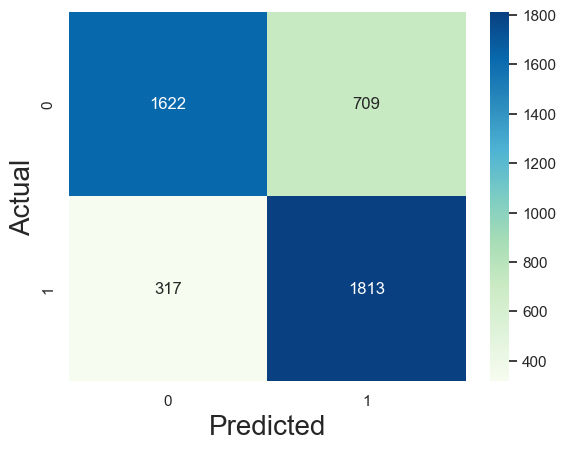

In [84]:
# Plotting confusion matrix:-
plt.fig= [4,2]
sns.heatmap(confusion, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [85]:
# Check the overall accuracy:-

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7700067249495629

In [86]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [87]:
# Sensitivity
TP / float(TP+FN)

0.8511737089201878

In [88]:
# Specificity
TN / float(TN+FP)

0.6958386958386958

In [89]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert:-

print(FP/ float(TN+FP))

0.30416130416130416


In [90]:
# positive predictive value :-

print (TP / float(TP+FP))

0.7188739095955591


In [91]:
# Negative predictive value:-

print (TN / float(TN+ FN))

0.8365136668385765


#### Precision and Recall

In [92]:
precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
precision

0.7188739095955591

In [93]:
recall = confusion[1,1]/(confusion[1,0]+confusion[1,1])
recall

0.8511737089201878

OBSERVATION : When using the cutoff point from the Precision-Recall trade-off curve, the count of True Positives decreased and the count of True Negatives increased.

This means that the Precision-Recall trade-off method is not appropriate here, as it lowers the number of True Positives and thus decreases Recall/Sensitivity. To boost the number of True Positives and improve Recall/Sensitivity, we will use 0.36 as the optimal cutoff point.